## Introduction

This project is looking at two sets of data to explore questions in biodiversity in national parks.

**Data sources:**

Both `Observations.csv` and `Species_info.csv` was provided by [Codecademy.com](https://www.codecademy.com).

Note: The data for this project is *inspired* by real data, but is mostly fictional.

## Goals

There are two goals of this project:
- look at general observations of diversity of species to check if one type is more susceptible then the other
- take a closer look at the `Grey Wolf` data since some early exploratory analysis showed some discrepancies  

## Explore Data

We start with Exploratory Data Analysis (EDA) to see the type of information the two datasets have. 

First we load the data into pandas DataFrames:

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

observations = pd.read_csv('observations.csv')
species_info = pd.read_csv('species_info.csv')

We use .head() to check the columns, data types, etc. of both datasets.

#### Observations

The `Observations.csv` contains information from recorded sightings of different species throughout the national parks in the past 7 days. The columns included are:

- **scientific_name** - The scientific name of each species
- **park_name** - The name of the national park
- **observations** - The number of observations in the past 7 days

In [3]:
observations.head(10)

,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85
5,Elymus virginicus var. virginicus,Yosemite National Park,112
6,Spizella pusilla,Yellowstone National Park,228
7,Elymus multisetus,Great Smoky Mountains National Park,39
8,Lysimachia quadrifolia,Yosemite National Park,168
9,Diphyscium cumberlandianum,Yellowstone National Park,250


In [4]:
observations.dtypes

scientific_name    object
park_name          object
observations        int64
dtype: object

We also use:
* **len()**: check size of df
* **count()**: look for missing values after using len()
* **nunique()**: Helps check the number of unique data we are working with.

In [5]:
print(len(observations))
print(observations.count())
print(observations['scientific_name'].nunique())
print(observations['park_name'].nunique())

23296
scientific_name    23296
park_name          23296
observations       23296
dtype: int64
5541
4


#### Species

The `species_info.csv` contains information on the different species in the National Parks. The columns in the data set include:
- **category** - The category of taxonomy for each species
- **scientific_name** - The scientific name of each species
- **common_names** - The common names of each species
- **conservation_status** - The species conservation status

In [6]:
species_info.head(10)

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN
5,Mammal,Odocoileus virginianus,White-Tailed Deer,NaN
6,Mammal,Sus scrofa,"Feral Hog, Wild Pig",NaN
7,Mammal,Canis latrans,Coyote,Species of Concern
8,Mammal,Canis lupus,Gray Wolf,Endangered
9,Mammal,Canis rufus,Red Wolf,Endangered


In [7]:
species_info.dtypes

category               object
scientific_name        object
common_names           object
conservation_status    object
dtype: object

In [8]:
print(len(species_info))
print(species_info.count())
print(species_info['scientific_name'].nunique())

5824
category               5824
scientific_name        5824
common_names           5824
conservation_status     191
dtype: int64
5541


The number of unique `scientific_name` is the same in both datasets, so we can probably combined them. Another thing we see is that there are probably repeats of `scientific_name`. We can get rid of these dupes if they don't add to the data.

In [9]:
dupe_species = species_info[species_info.duplicated('scientific_name')]
dupe_species.head()

,category,scientific_name,common_names,conservation_status
3017,Mammal,Cervus elaphus,Rocky Mountain Elk,NaN
3019,Mammal,Odocoileus virginianus,"White-Tailed Deer, White-Tailed Deer",NaN
3020,Mammal,Canis lupus,"Gray Wolf, Wolf",In Recovery
3022,Mammal,Puma concolor,"Cougar, Mountain Lion, Puma",NaN
3025,Mammal,Lutra canadensis,River Otter,NaN


In [10]:
print(dupe_species[dupe_species['scientific_name'].str.contains('Cervus elaphus')])
print('')
print(dupe_species[dupe_species['scientific_name'].str.contains('Canis lupus')])

     category scientific_name        common_names conservation_status
3017   Mammal  Cervus elaphus  Rocky Mountain Elk                 NaN

     category scientific_name     common_names conservation_status
3020   Mammal     Canis lupus  Gray Wolf, Wolf         In Recovery
4448   Mammal     Canis lupus  Gray Wolf, Wolf          Endangered


Something interesting is the data for `Gray Wolf` (`Canis lupus`); We see 3 duplicates for it in `species_info` DataFrame. Let's check the `observation` DataFrame. This could be due to observations from different parks.

In [11]:
print(observations[observations['scientific_name'].str.contains('Canis lupus')])

      scientific_name                            park_name  observations
1294      Canis lupus               Yosemite National Park            35
1766      Canis lupus                  Bryce National Park            27
7346      Canis lupus                  Bryce National Park            29
9884      Canis lupus                  Bryce National Park            74
10190     Canis lupus  Great Smoky Mountains National Park            15
10268     Canis lupus            Yellowstone National Park            60
10907     Canis lupus            Yellowstone National Park            67
13427     Canis lupus            Yellowstone National Park           203
17756     Canis lupus  Great Smoky Mountains National Park            14
19330     Canis lupus               Yosemite National Park           117
19987     Canis lupus               Yosemite National Park            44
20353     Canis lupus  Great Smoky Mountains National Park            30


It is unclear as to why there are duplicates of `scientific_name`. We will get rid of duplicates later on, but we will reserve the worst `conservation_status` (i.e. `Endangered` is worst than `In Recovery`) for those species in order to not undermine their severity.

## Analysis

This section will begin analyzing the data after the initial exploration. First task will be to clean and explore the `conservation_status` column in `species`. 

The column `conservation_status` has several possible values:
- `Species of Concern`: declining or appear to be in need of conservation
- `Threatened`: vulnerable to endangerment in the near future
- `Endangered`: seriously at risk of extinction
- `In Recovery`: formerly `Endangered`, but currently neither in danger of extinction throughout all or a significant portion of its range

In the exploration, a lot of `nan` values were detected. These values will need to be converted to `No Intervention`.

In [12]:
species_info.fillna('No Intervention', inplace=True)
species_info.groupby("conservation_status").size()

conservation_status
Endangered              16
In Recovery              4
No Intervention       5633
Species of Concern     161
Threatened              10
dtype: int64

Looks like most species are not part of conservation (5633 vs 191). We then create a DataFrame without `No Intervention`.

In [13]:
conservation_df = species_info[~species_info['conservation_status'].str.contains('No Intervention')]\
    .groupby(["conservation_status", "category"])['scientific_name']\
    .count()\
    .unstack()
conservation_df

category,Amphibian,Bird,Fish,Mammal,Nonvascular Plant,Reptile,Vascular Plant
conservation_status,,,,,,,
Endangered,1.0,4.0,3.0,7.0,NaN,NaN,1.0
In Recovery,NaN,3.0,NaN,1.0,NaN,NaN,NaN
Species of Concern,4.0,72.0,4.0,28.0,5.0,5.0,43.0
Threatened,2.0,NaN,4.0,2.0,NaN,NaN,2.0


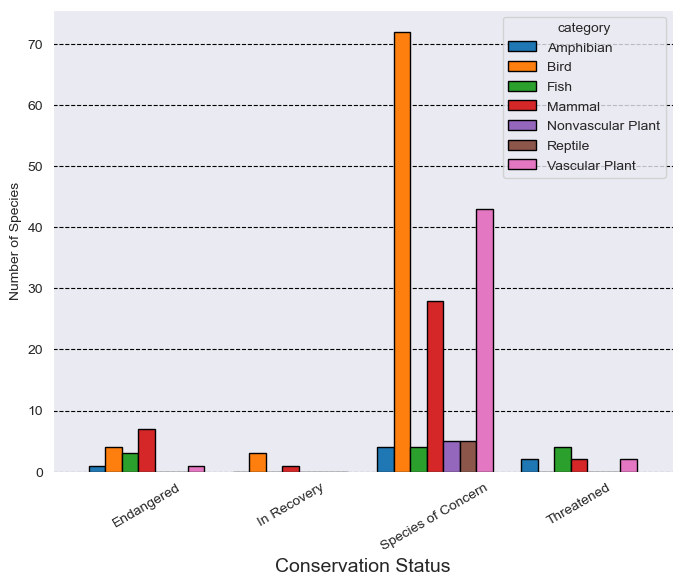

In [14]:
sns.set_style("dark")
ax = conservation_df.plot(kind = 'bar', figsize=(8,6), width=.8, edgecolor='black')
ax.set_xlabel("Conservation Status", fontsize=14)
ax.set_ylabel("Number of Species")
ax.set_xticklabels(conservation_df.index.values, rotation=30)
ax.yaxis.grid(True, linestyle='--', color='black')

We have a general idea of the distribution of conservation status across the different types of species. `Bird` and `Vascular Plants` are seen to have the highest amount of species of concern, followed by `Mammal`.

# Wolf Population

Next we take a closer look at the wolf population.

In [15]:
species_info['is_wolf'] = species_info.common_names.str.contains(r"\bWolf\b", regex = True)

species_info.head(10)

,category,scientific_name,common_names,conservation_status,is_wolf
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,No Intervention,False
1,Mammal,Bos bison,"American Bison, Bison",No Intervention,False
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",No Intervention,False
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",No Intervention,False
4,Mammal,Cervus elaphus,Wapiti Or Elk,No Intervention,False
5,Mammal,Odocoileus virginianus,White-Tailed Deer,No Intervention,False
6,Mammal,Sus scrofa,"Feral Hog, Wild Pig",No Intervention,False
7,Mammal,Canis latrans,Coyote,Species of Concern,False
8,Mammal,Canis lupus,Gray Wolf,Endangered,True
9,Mammal,Canis rufus,Red Wolf,Endangered,True


Use the `is_wolf` boolean column to just look at Wolf species. Then make sure they are just animals and not plants.

In [16]:
species_info[species_info.is_wolf]

,category,scientific_name,common_names,conservation_status,is_wolf
8,Mammal,Canis lupus,Gray Wolf,Endangered,True
9,Mammal,Canis rufus,Red Wolf,Endangered,True
3020,Mammal,Canis lupus,"Gray Wolf, Wolf",In Recovery,True
3993,Vascular Plant,Euphorbia esula,"Leafy Spurge, Spurge, Wolf's Milk, Wolf's-Milk",No Intervention,True
4020,Vascular Plant,Salix wolfii var. idahoensis,Wolf's Willow,No Intervention,True
4288,Vascular Plant,Trisetum wolfii,"Wolf Trisetum, Wolf's Trisetum",No Intervention,True
4448,Mammal,Canis lupus,"Gray Wolf, Wolf",Endangered,True


Remove any non-mammal species.

In [17]:
species_info[(species_info.is_wolf) & (species_info.category == 'Mammal')]

,category,scientific_name,common_names,conservation_status,is_wolf
8,Mammal,Canis lupus,Gray Wolf,Endangered,True
9,Mammal,Canis rufus,Red Wolf,Endangered,True
3020,Mammal,Canis lupus,"Gray Wolf, Wolf",In Recovery,True
4448,Mammal,Canis lupus,"Gray Wolf, Wolf",Endangered,True


Merge the `species_info` with `observation` that has the park data.

In [18]:
wolf_observation = observations.merge(species_info[(species_info.is_wolf) & (species_info.category == 'Mammal')])
wolf_observation

,scientific_name,park_name,observations,category,common_names,conservation_status,is_wolf
0,Canis rufus,Bryce National Park,30,Mammal,Red Wolf,Endangered,True
1,Canis rufus,Yosemite National Park,34,Mammal,Red Wolf,Endangered,True
2,Canis rufus,Great Smoky Mountains National Park,13,Mammal,Red Wolf,Endangered,True
3,Canis rufus,Yellowstone National Park,60,Mammal,Red Wolf,Endangered,True
4,Canis lupus,Yosemite National Park,35,Mammal,Gray Wolf,Endangered,True
5,Canis lupus,Yosemite National Park,35,Mammal,"Gray Wolf, Wolf",In Recovery,True
6,Canis lupus,Yosemite National Park,35,Mammal,"Gray Wolf, Wolf",Endangered,True
7,Canis lupus,Bryce National Park,27,Mammal,Gray Wolf,Endangered,True
8,Canis lupus,Bryce National Park,27,Mammal,"Gray Wolf, Wolf",In Recovery,True
9,Canis lupus,Bryce National Park,27,Mammal,"Gray Wolf, Wolf",Endangered,True


We can see clearly that there are duplicates of the `Gray Wolf` data due to how the data was entered. The counts are the same, but `common_name` and `conservation_status` seems to have changed. Let's use `.drop()` to remove the duplicates. 

In [19]:
wolf_observation.drop(wolf_observation[(wolf_observation['conservation_status'] == 'In Recovery') |\
                                        (wolf_observation['common_names'] == 'Gray Wolf')].index,  \
                                        inplace=True)
wolf_observation

,scientific_name,park_name,observations,category,common_names,conservation_status,is_wolf
0,Canis rufus,Bryce National Park,30,Mammal,Red Wolf,Endangered,True
1,Canis rufus,Yosemite National Park,34,Mammal,Red Wolf,Endangered,True
2,Canis rufus,Great Smoky Mountains National Park,13,Mammal,Red Wolf,Endangered,True
3,Canis rufus,Yellowstone National Park,60,Mammal,Red Wolf,Endangered,True
6,Canis lupus,Yosemite National Park,35,Mammal,"Gray Wolf, Wolf",Endangered,True
9,Canis lupus,Bryce National Park,27,Mammal,"Gray Wolf, Wolf",Endangered,True
12,Canis lupus,Bryce National Park,29,Mammal,"Gray Wolf, Wolf",Endangered,True
15,Canis lupus,Bryce National Park,74,Mammal,"Gray Wolf, Wolf",Endangered,True
18,Canis lupus,Great Smoky Mountains National Park,15,Mammal,"Gray Wolf, Wolf",Endangered,True
21,Canis lupus,Yellowstone National Park,60,Mammal,"Gray Wolf, Wolf",Endangered,True


There are multiple instances of `observations` for `Gray Wolf` in each park, 3 to be exact. This could be an artifact of how the data was initially collected (recall the copies of `Gray Wolf` we removed). We can combine the data for now.

In [20]:
wolf_obs_reduced =  wolf_observation.groupby(['park_name', 'common_names']).observations.sum().reset_index()
wolf_obs_reduced

,park_name,common_names,observations
0,Bryce National Park,"Gray Wolf, Wolf",130
1,Bryce National Park,Red Wolf,30
2,Great Smoky Mountains National Park,"Gray Wolf, Wolf",59
3,Great Smoky Mountains National Park,Red Wolf,13
4,Yellowstone National Park,"Gray Wolf, Wolf",330
5,Yellowstone National Park,Red Wolf,60
6,Yosemite National Park,"Gray Wolf, Wolf",196
7,Yosemite National Park,Red Wolf,34


Just glancing at the `observations` numbers, some of the proportions of `Wolf` populations (`Red Wolf` compared to `Grey Wolf`) in the parks seem to be quite different. We do some quick calculations below. 

In [21]:
print('Bryce National Park Gray Wolf, Red Wolf Proportion')
print((wolf_obs_reduced.observations[1]/wolf_obs_reduced.observations[0]))
print('Great Smokey Mountains National Park Gray Wolf, Red Wolf Proportion')
print((wolf_obs_reduced.observations[3]/wolf_obs_reduced.observations[2]))
print('Yellowstone National Park Gray Wolf, Red Wolf Proportion')
print((wolf_obs_reduced.observations[5]/wolf_obs_reduced.observations[4]))
print('Yosemite National Park Gray Wolf, Red Wolf Proportion')
print((wolf_obs_reduced.observations[7]/wolf_obs_reduced.observations[6]))

Bryce National Park Gray Wolf, Red Wolf Proportion
0.23076923076923078
Great Smokey Mountains National Park Gray Wolf, Red Wolf Proportion
0.22033898305084745
Yellowstone National Park Gray Wolf, Red Wolf Proportion
0.18181818181818182
Yosemite National Park Gray Wolf, Red Wolf Proportion
0.17346938775510204


There indeed is a difference between the proportions of population for the different `Wolfs` between the parks. Let's look at how much it is between the parks. 

In [22]:
print('Bryce and Yellowstone Difference percentage')
print(str(round(((.2308-.1818)/.2308*100), 2)) + '%')
print('Great Smokey and Yellowstone Difference percentage')
print(str(round(((.2203-.1818)/.2203*100), 2)) + '%')
print('Bryce and Yosemite Difference percentage')
print(str(round(((.2308-.1735)/.2308*100), 2)) + '%')
print('Great Smokey and Yosemite Difference percentage')
print(str(round(((.2203-.1735)/.2203*100), 2)) + '%')

Bryce and Yellowstone Difference percentage
21.23%
Great Smokey and Yellowstone Difference percentage
17.48%
Bryce and Yosemite Difference percentage
24.83%
Great Smokey and Yosemite Difference percentage
21.24%


In [29]:
(21.34+17.48+24.83+21.24)/4

21.2225

### Chi-Squared Test

Using chi-squared tests will show if these proportions are significant, i.e. if the population of `Red Wolf` and `Grey Wolf` is significantly different depending on the park. The first example to look at are parks with similar `Wolf` population proportions.

||Red Wolf|Grey Wolf|
|-|-|-|
|Bryce National Park|?|?|
|Great Smokey National Park|?|?|

In [23]:
from scipy.stats import chi2_contingency

contingency1 = [[30, 130],
              [13, 59]]
chi2_contingency(contingency1)

(0.0,
 1.0,
 1,
 array([[ 29.65517241, 130.34482759],
        [ 13.34482759,  58.65517241]]))

The results from the chi-squared test returns many values, the second value which is 1.0 is the p-value. The standard p-value to test statistical significance is 0.05. For the value retrieved from this test, the value of 1.0 is much larger than 0.05. In the case of `Bryce National Park` and `Great Smokey National Park`, there doesn't seem to be any significant relationship between them i.e. the variables are independent. 

Next we look at a few tests shown here.

||Red Wolf|Grey Wolf|
|-|-|-|
|Bryce National Park|?|?|
|Yellowstone National Park|?|?|

||Red Wolf|Grey Wolf|
|-|-|-|
|Bryce National Park|?|?|
|Yosemite National Park|?|?|

||Red Wolf|Grey Wolf|
|-|-|-|
|Great Smokey National Park|?|?|
|Yellowstone National Park|?|?|

||Red Wolf|Grey Wolf|
|-|-|-|
|Bryce National Park|?|?|
|Yosemite National Park|?|?|

In [24]:
contingency2 = [[30, 130],
              [60, 330]]
chi2_contingency(contingency2)

(0.7090934867769101,
 0.3997449166561353,
 1,
 array([[ 26.18181818, 133.81818182],
        [ 63.81818182, 326.18181818]]))

In [25]:
contingency3 = [[30, 130],
              [34, 196]]
chi2_contingency(contingency3)

(0.8128310127492343,
 0.36728458246314855,
 1,
 array([[ 26.25641026, 133.74358974],
        [ 37.74358974, 192.25641026]]))

In [26]:
contingency4 = [[13, 59],
              [60, 330]]
chi2_contingency(contingency4)

(0.15606557843325786,
 0.6928049830855726,
 1,
 array([[ 11.37662338,  60.62337662],
        [ 61.62337662, 328.37662338]]))

In [27]:
contingency5 = [[13, 59],
              [34, 196]]
chi2_contingency(contingency5)

(0.23262805358550045,
 0.6295819763951651,
 1,
 array([[ 11.20529801,  60.79470199],
        [ 35.79470199, 194.20529801]]))

All the p-values were well above .05, the lowest being ~.37. This shows there isn't a relationship between the wolf species and parks.

### Visualization

Below is a graph of the counts of `Wolf` population in the different parks using the previous data manipulation. Some things to note:

- Both wolf species are endangered
- There is a large population in `Yellowstone National Park` for both species and a proportionally low population in `Great Smoky Mountains National Park`
- The `Red Wolf` population is proportionally small compared to `Grey Wolf`, more so in `Yellowstone National Park` and `Yosemite National Park` (although not significantly as shown from the chi-squared tests)

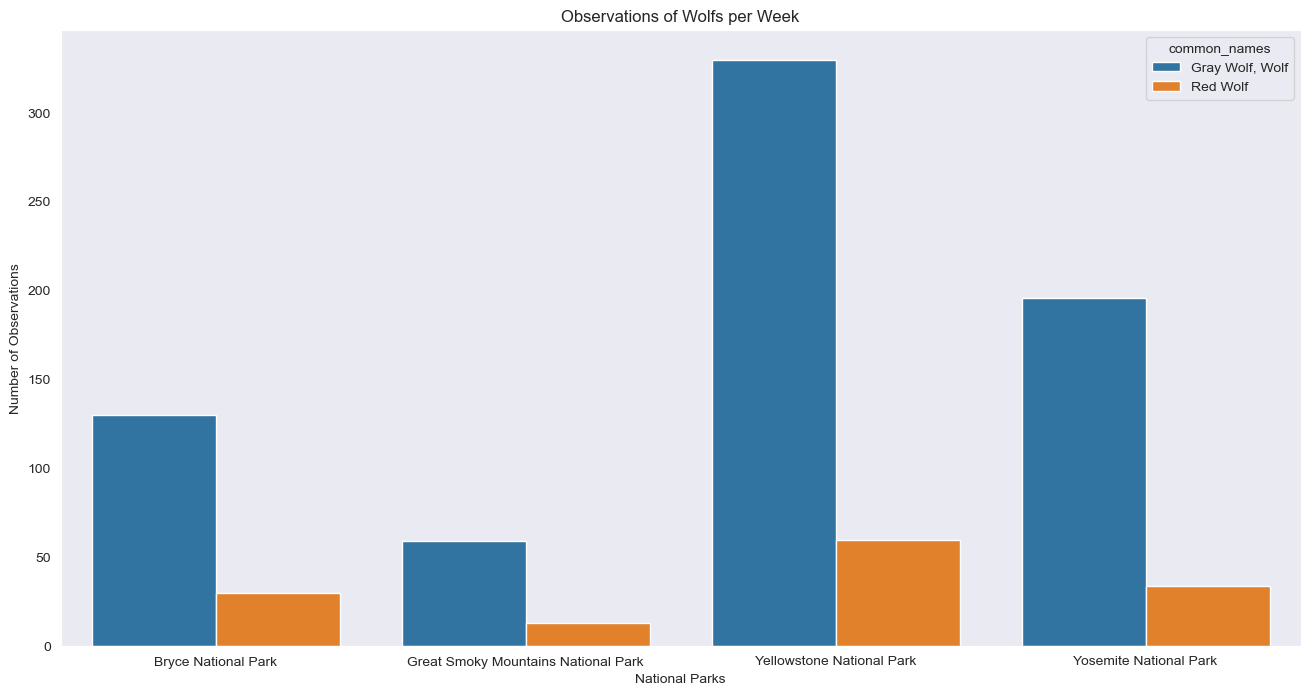

In [28]:
plt.figure(figsize=(16, 8))
sns.barplot(x=wolf_obs_reduced.park_name, y= wolf_obs_reduced.observations, hue=wolf_obs_reduced.common_names)
plt.xlabel('National Parks')
plt.ylabel('Number of Observations')
plt.title('Observations of Wolfs per Week')
plt.show()

## Conclusion
Here we go over some of the information we got from this project:

- The vast majority of species were not part of conservation.(5,633 vs 191)
- Birds, mammals, and vascular plants had the highest proportion of being in protection
- The grey wolf data seemed to have been generated incorrectly (considering this was fictional data)
- The cleaned wolf data showed large populations of wolves in Yellowstone National Park and low populations in Great Smokey National Park
- There is average difference in proportion of 21.22% for Red Wolves and Grey Wolves in Bryce National Park and Great Smokey National Park compared to Yellowstone National Park and Yosemite National Park
    - Although this was statistically insignificant, it's worth to keep vigilance on the wolf populations in these parks

### Further Research

Analyzing the dataset used for this study revealed some limitations. The observations used for analysis only cover the past 7 days, which limits the ability to track changes over a longer period. It would be beneficial to examine the conservation status of different species over a more extended period to identify potential trends. Additionally, information about the area of each park is not available, which could impact the observed number of species and overall biodiversity. For example, Yellowstone National Park may have more observations due to its larger size compared to other parks. Furthermore, if the dataset included precise location data, it would allow for analyzing the spatial distribution of various species and identifying any clustering patterns.